In [31]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

from IPython.display import HTML, display # displaying maps in the notebook
import seaborn as sns; sns.set() # graphing data

In [35]:
#To start, let's take a look at what the data looks like. Open the .csv file.

main_df = pd.read_csv('BI_project.csv')
main_df.head()

,id,host_location,name,host_name,host_since,host_response_time,host_response_rate,host_is_superhost,host_neighbourhood,street,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,958,"San Francisco, California, United States","Bright, Modern Garden Unit - 1BR/1B",Holly,7/31/08,within a few hours,100%,t,Duboce Triangle,"San Francisco, CA, United States",...,t,f,moderate,f,f,1,1,0,0,1.60
1,5858,"San Francisco, California, United States",Creative Sanctuary,Philip And Tania,3/2/09,within a day,100%,f,Bernal Heights,"San Francisco, CA, United States",...,f,f,strict_14_with_grace_period,f,f,1,1,0,0,0.90
2,7918,"San Francisco, California, United States",A Friendly Room - UCSF/USF - San Francisco,Aaron,6/17/09,within a few hours,100%,f,Cole Valley,"San Francisco, CA, United States",...,f,f,strict_14_with_grace_period,f,f,9,0,9,0,0.14
3,8142,"San Francisco, California, United States",Friendly Room Apt. Style -UCSF/USF - San Franc...,Aaron,6/17/09,within a few hours,100%,f,Cole Valley,"San Francisco, CA, United States",...,f,f,strict_14_with_grace_period,f,f,9,0,9,0,0.14
4,8339,"San Francisco, California, United States",Historic Alamo Square Victorian,Rosy,7/2/09,within an hour,100%,f,Alamo Square,"San Francisco, CA, United States",...,f,f,moderate,t,t,2,2,0,0,0.23


In [36]:
print(main_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7575 entries, 0 to 7574
Data columns (total 58 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            7575 non-null   int64  
 1   host_location                                 7571 non-null   object 
 2   name                                          7574 non-null   object 
 3   host_name                                     7575 non-null   object 
 4   host_since                                    7575 non-null   object 
 5   host_response_time                            6803 non-null   object 
 6   host_response_rate                            6803 non-null   object 
 7   host_is_superhost                             7575 non-null   object 
 8   host_neighbourhood                            7076 non-null   object 
 9   street                                        7575 non-null   o

In [37]:
print("Neighbourhood Groups:", main_df['neighbourhood'].unique().tolist())
print("Room Types:", main_df['property_type'].unique().tolist())

Neighbourhood Groups: ['Lower Haight', 'Bernal Heights', 'Cole Valley', 'Alamo Square', 'Western Addition/NOPA', 'Mission District', 'Potrero Hill', 'Hayes Valley', 'Union Square', 'Haight-Ashbury', 'The Castro', 'South Beach', 'Noe Valley', 'Nob Hill', 'Richmond District', 'Presidio Heights', 'Glen Park', 'Dogpatch', 'Ingleside', 'Pacific Heights', 'SoMa', 'Financial District', 'Twin Peaks', 'Inner Sunset', 'Russian Hill', 'Outer Sunset', 'Marina', 'Excelsior', 'Chinatown', 'Civic Center', 'Tenderloin', 'Balboa Terrace', 'Bayview', 'Telegraph Hill', 'Diamond Heights', 'Duboce Triangle', 'West Portal', 'North Beach', 'Mission Terrace', 'Sunnyside', 'Cow Hollow', "Fisherman's Wharf", 'Lakeshore', 'Crocker Amazon', 'Downtown', 'Oceanview', 'Portola', 'Parkside', 'Presidio', "Fisherman''s Wharf", 'Forest Hill', 'Visitacion Valley', 'Mission Bay', 'Sea Cliff', 'Daly City', 'Japantown']
Room Types: ['Apartment', 'House', 'Condominium', 'Townhouse', 'Loft', 'Guest suite', 'Cottage', 'Hostel'

# Natural Language Processing

In [40]:
# getting list of all names
names = main_df['name'].tolist()
name_words = []
for name in names:
    name = str(name).split()
    for word in name:
        name_words.append(word.lower())

In [41]:
print(name_words[:30])

['bright,', 'modern', 'garden', 'unit', '-', '1br/1b', 'creative', 'sanctuary', 'a', 'friendly', 'room', '-', 'ucsf/usf', '-', 'san', 'francisco', 'friendly', 'room', 'apt.', 'style', '-ucsf/usf', '-', 'san', 'francisco', 'historic', 'alamo', 'square', 'victorian', 'lovely', '2br']


In [42]:
import nltk # natural language toolkit
from nltk.corpus import stopwords

filtered_words = [word for word in name_words if word not in stopwords.words('english')]
print(filtered_words[:30])

['bright,', 'modern', 'garden', 'unit', '-', '1br/1b', 'creative', 'sanctuary', 'friendly', 'room', '-', 'ucsf/usf', '-', 'san', 'francisco', 'friendly', 'room', 'apt.', 'style', '-ucsf/usf', '-', 'san', 'francisco', 'historic', 'alamo', 'square', 'victorian', 'lovely', '2br', 'flat']


In [60]:
from collections import Counter # to count words in our list

# plotting top 25 words used by the host in naming their home
words_count = Counter(filtered_words).most_common()
words_count = words_count[:30]

In [61]:
# converting the data into a dataframe so we can plot it using Seaborn
words_df = pd.DataFrame(words_count)
words_df.head()

,0,1
0,private,1135
1,room,1107
2,bedroom,701
3,home,624
4,studio,597


In [62]:
words_df.rename(columns={0:"Words", 1:"Count"}, inplace=True)

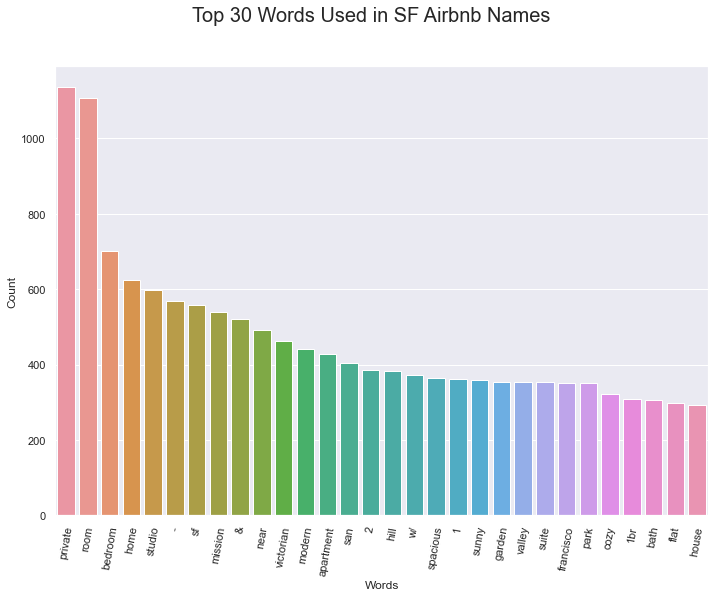

In [64]:
# Now let's plot!
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
fig.suptitle('Top 30 Words Used in SF Airbnb Names', fontsize=20)
sns.barplot(x='Words', y='Count', data=words_df, ax=ax)
plt.xticks(rotation=80)
plt.show()

In [47]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/saurabh/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [74]:
# initialize the analyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

In [71]:
# preparing an array that we will use as data for our dataframe
data = []
for i,row in main_df.iterrows():
    # we want to create a dictionary that stores the name and price of a property, as well as the neutral, positive, and
    # compound scores that were returned by NLTK.
    dic = {}
    ss = sid.polarity_scores(str(row['name']))
    
    dic['name'] = row['name']
    dic['sentiment_pos'] = ss['pos']
    dic['sentiment_neu'] = ss['neu']
    dic['sentiment_compound'] = ss['compound']
    dic['price'] = row['price']
    data.append(dic)

In [72]:
# building our dataframe from the data
sentiment_df = pd.DataFrame(data)
sentiment_df.head(50)

,name,sentiment_pos,sentiment_neu,sentiment_compound,price
0,"Bright, Modern Garden Unit - 1BR/1B",0.420,0.580,0.4404,$170.00
1,Creative Sanctuary,0.744,0.256,0.4404,$235.00
2,A Friendly Room - UCSF/USF - San Francisco,0.444,0.556,0.4939,$65.00
3,Friendly Room Apt. Style -UCSF/USF - San Franc...,0.348,0.652,0.4939,$65.00
4,Historic Alamo Square Victorian,0.000,1.000,0.0000,$685.00
5,Lovely 2BR flat Great Location,0.725,0.275,0.8360,$255.00
6,"Mission Sunshine, with Private Bath",0.444,0.556,0.4939,$139.00
7,Artful Potrero Separate Floor with Garden,0.000,1.000,0.0000,$135.00
8,Victorian Suite in Inner Mission,0.000,1.000,0.0000,$265.00
9,Haight Buena Vista Park Garden 3BR,0.000,1.000,0.0000,$177.00
